# Final Solution

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.simplefilter('ignore')


In [ ]:
train = pd.read_csv('/content/new_train.csv')
test = pd.read_csv('/content/new_test.csv')
sample = pd.read_csv('/content/new_sample_submission.csv')
sample.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.45,199.95,3091.65,993.15,1285.95
1,2011-08-05,473.05,196.40,3058.90,966.50,1242.05
2,2011-08-08,462.10,195.00,3080.70,950.90,1235.45
3,2011-08-09,464.45,199.75,3148.00,940.15,1205.20
4,2011-08-10,479.90,197.10,3154.85,963.70,1250.10


In [ ]:
train.head(5).append(test.head(5))

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.80,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.10,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.00,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.00,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.00,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.50,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.50,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.20,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.00,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.00,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.10,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.00,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.00,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.00,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.00,1214.80,1209.27,1424594,172272511430000
0,2011-08-04,484.1,488.90,475.00,NaN,481.00,1829606,88003633160000,204.90,206.75,199.20,NaN,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,NaN,3078.97,53783,16559616060000,1008.50,1015.00,990.00,NaN,1003.31,2716435,272542181190000,1303.6,1312.80,1281.00,NaN,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,NaN,469.56,3156094,148196817355000,195.00,198.00,190.50,NaN,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,NaN,3061.60,129372,39608524605000,970.00,979.70,950.00,NaN,961.50,4644498,446567961345000,1245.0,1252.50,1200.00,NaN,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,NaN,465.04,4308373,200357861965000,193.90,197.80,189.65,NaN,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,NaN,3069.09,46725,14340318455000,940.05,975.00,933.40,NaN,953.24,3450619,328925252905000,1205.2,1265.80,1200.55,NaN,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,NaN,460.88,4490924,206978212685000,190.25,202.10,190.10,NaN,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,NaN,3113.84,88749,27635029505000,915.00,967.60,910.45,NaN,938.80,5346085,501890604795000,1190.5,1238.30,1180.90,NaN,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,NaN,478.06,3267226,156192368225000,202.00,202.85,196.00,NaN,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,NaN,3170.39,52720,16714302965000,963.95,971.20,957.70,NaN,964.75,3379659,326053305165000,1242.0,1253.70,1225.30,NaN,1242.10,1903396,236421421150000


In [ ]:
"""
def create_date_featues(df):

    df['Year'] = pd.to_datetime(df['Date']).dt.year

    df['Month'] = pd.to_datetime(df['Date']).dt.month

    df['Day'] = pd.to_datetime(df['Date']).dt.day

    df['Dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek

    df['DayOfyear'] = pd.to_datetime(df['Date']).dt.dayofyear

    df['Week'] = pd.to_datetime(df['Date']).dt.week

    df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter 

    df['Is_month_start'] = pd.to_datetime(df['Date']).dt.is_month_start

    df['Is_month_end'] = pd.to_datetime(df['Date']).dt.is_month_end

    df['Is_quarter_start'] = pd.to_datetime(df['Date']).dt.is_quarter_start

    df['Is_quarter_end'] = pd.to_datetime(df['Date']).dt.is_quarter_end

    df['Is_year_end'] = pd.to_datetime(df['Date']).dt.is_year_end

    df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)

    df['Days_in_month'] = pd.to_datetime(df['Date']).dt.days_in_month
    

    return df

train1 = create_date_featues(train)

"""

In [ ]:
"""
train['log1'] = train['Volume-Stock-1'])
train['log2'] = train['Volume-Stock-2'])
train['log3'] = train['Volume-Stock-3'])
train['log4'] = train['Volume-Stock-4'])
train['log5'] = train['Volume-Stock-5'])

train['div1'] = train[col1].mean(axis = 1)
train['div2'] = train[col2].mean(axis = 1)
train['div3'] = train[col3].mean(axis = 1)
train['div4'] = train[col4].mean(axis = 1)
train['div5'] = train[col5].mean(axis = 1)
"""

# Plots

In [ ]:
import plotly.express as px

fig = px.line(train, y='Close-Stock-1', x='Date', title='Stock 1')

fig.update_xaxes(
    rangeslider_visible=True)

fig.show()

In [ ]:
fig = px.line(train, y='Close-Stock-2', x='Date', title='Stock 2')

fig.update_xaxes(
    rangeslider_visible=True)

fig.show()

In [ ]:
fig = px.line(train, y='Close-Stock-3', x='Date', title='Stock 3')

fig.update_xaxes(
    rangeslider_visible=True)

fig.show()

In [ ]:
fig = px.line(train, y='Close-Stock-4', x='Date', title='Stock 4')

fig.update_xaxes(
    rangeslider_visible=True)

fig.show()

In [ ]:
fig = px.line(train, y='VWAP-Stock-5', x='Date', title='Stock 5')

fig.update_xaxes(
    rangeslider_visible=True)

fig.show()

In [ ]:
def summary(df,col):
  return df[col].describe(percentiles = [0.1,0.25,0.5,0.75,0.95,0.99])

summary(train,col1)
#summary(train,col2)
#summary(train,col3)


# Models

In [ ]:
train.columns

Index(['Date', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2',
       'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2', 'VWAP-Stock-2',
       'Volume-Stock-2', 'Turnover-Stock-2', 'Open-Stock-3', 'High-Stock-3',
       'Low-Stock-3', 'Close-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3',
       'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4',
       'Close-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5',
       'VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5'],
      dtype='object')

In [ ]:
col1 = ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1','VWAP-Stock-1']
col2=['Open-Stock-2','High-Stock-2', 'Low-Stock-2','VWAP-Stock-2' ]
col3=[ 'Open-Stock-3', 'High-Stock-3','Low-Stock-3',  'VWAP-Stock-3']
col4=['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4','VWAP-Stock-4' ]
col5=[ 'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5','VWAP-Stock-5']

In [ ]:
X1 = train[col1]
y1 = train['Close-Stock-1']
X2 = train[col2]
y2 = train['Close-Stock-2']
X3 = train[col3]
y3 = train['Close-Stock-3']
X4 = train[col4]
y4 = train['Close-Stock-4']
X5 = train[col5]
y5 = train['Close-Stock-5']


In [ ]:
"""
X_train = X3.iloc[:200]
X_test = X3.iloc[200:]
y_train = y3.iloc[:200]
y_test = y3.iloc[200:]

"""

In [ ]:
# Best models 

lr = LinearRegression(normalize=True)
huber = HuberRegressor()
lasso = Lasso(alpha=0.01,normalize = True,max_iter=1000)
ridge = Ridge()
bagging = BaggingRegressor(base_estimator = huber,n_estimators=500) #max_samples=0.9, max_features=1, bootstrap=True, bootstrap_features=False) #(200,300,400,500,600,700,800,900,1000) best-500
bagging1 = BaggingRegressor(base_estimator = lr,n_estimators=500) #(200,300,400,500,600,700,800,900,1000) best-500


# fbprophet ( stock 4)

In [ ]:
from fbprophet import Prophet

train4 = train[['Date','Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4','Close-Stock-4']].rename(columns={'Date':'ds', 'Open-Stock-4': 'add1', 'High-Stock-4':'add2', 'Low-Stock-4':'add3', 'VWAP-Stock-4':'add4' ,'Close-Stock-4': 'y'})

test4 = test[['Date','Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']].rename(columns={'Date':'ds', 'Open-Stock-4': 'add1', 'High-Stock-4':'add2', 'Low-Stock-4':'add3', 'VWAP-Stock-4':'add4' })

train4.shape

(299, 6)

In [ ]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')


model.fit(train4)

#forecast = model.predict(test4.drop(columns="y"))
#rmse = np.sqrt(mean_squared_error(X_test['y'], forecast['yhat'])) 
#print(rmse)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


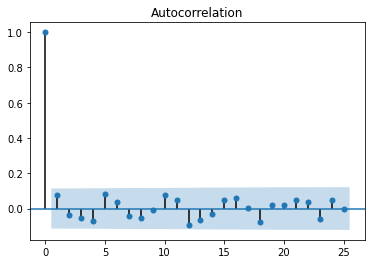

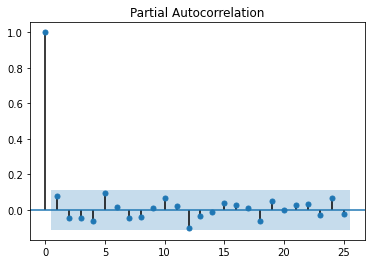

In [ ]:
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf

def plot_p(col):
   plot_acf(train[col].diff(1).dropna())
   plot_pacf(train[col].diff(1).dropna())
plot_p('Close-Stock-3')

In [ ]:
"""
from statsmodels.tsa.stattools import adfuller

diff1 = train['Close-Stock-5'].diff(1)
first = diff1.dropna()
adfuller(first)
"""

(-11.130623492849642,
 3.2891814652909663e-20,
 2,
 295,
 {'1%': -3.452713099849546,
  '10%': -2.5720171933352485,
  '5%': -2.871387839457783},
 2630.5061123289875)

# Model function

In [ ]:
def fit_predict_Check(estimator,x,y,x1,y1 ):
  
  estimator.fit(x,y)
  #print("Estimator " ,estimator)
  print("Features",x.columns.tolist())
  y_pred =  estimator.predict(x1)
  pred_t = estimator.predict(x)
  print("RMSE train ==> ",np.sqrt(mean_squared_error(y,pred_t)))
  print("RMSE test ==> ",np.sqrt(mean_squared_error(y1,y_pred)))

# Stock 1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,shuffle = False, random_state = 42)


fit_predict_Check(ridge,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lr,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lasso,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging1,X_train,y_train,X_test,y_test)




Features ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1']
RMSE train ==>  12.536238352680856
RMSE test ==>  7.195838622517364


Features ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1']
RMSE train ==>  12.597278783804548
RMSE test ==>  7.127185266388871


Features ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1']
RMSE train ==>  12.536238350621778
RMSE test ==>  7.195846123141987


Features ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1']
RMSE train ==>  12.735446986448965
RMSE test ==>  7.167578959827786


Features ['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1']
RMSE train ==>  12.540398878562453
RMSE test ==>  7.214356737598252




# Stock2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,shuffle = False, random_state = 42)


fit_predict_Check(ridge,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lr,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lasso,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging1,X_train,y_train,X_test,y_test)


Features ['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2']
RMSE train ==>  1.005934546215623
RMSE test ==>  0.9107864344279218


Features ['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2']
RMSE train ==>  1.0211159817734994
RMSE test ==>  0.9160720371118402


Features ['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2']
RMSE train ==>  1.0059263961690275
RMSE test ==>  0.9109899039512959


Features ['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2']
RMSE train ==>  1.3773449598768555
RMSE test ==>  1.2894118235384953


Features ['Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'VWAP-Stock-2']
RMSE train ==>  1.0084283039952455
RMSE test ==>  0.9121151910712709


# Stock 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2,shuffle = False, random_state =42 )

fit_predict_Check(ridge,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lr,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lasso,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging1,X_train,y_train,X_test,y_test)

Features ['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3']
RMSE train ==>  15.115549962196846
RMSE test ==>  19.49097896944625


Features ['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3']
RMSE train ==>  15.542370698090782
RMSE test ==>  15.986334661802514


Features ['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3']
RMSE train ==>  15.115549960577807
RMSE test ==>  19.490904402351763


Features ['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3']
RMSE train ==>  15.235832691011227
RMSE test ==>  20.37577144800394


Features ['Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3']
RMSE train ==>  15.12202927157101
RMSE test ==>  19.57473293559947


# Stock 4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2,shuffle = False, random_state = 42)


fit_predict_Check(ridge,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lr,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lasso,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging1,X_train,y_train,X_test,y_test)

Features ['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']
RMSE train ==>  6.95734610307098
RMSE test ==>  4.6419278707092415


Features ['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']
RMSE train ==>  6.993777085035205
RMSE test ==>  4.5788200848145335


Features ['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']
RMSE train ==>  6.957346091583761
RMSE test ==>  4.642031080001533


Features ['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']
RMSE train ==>  7.365528977083202
RMSE test ==>  4.437460720373663


Features ['Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'VWAP-Stock-4']
RMSE train ==>  6.962630861969953
RMSE test ==>  4.6104313758217685


# Stock 5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2,shuffle = False, random_state = 42)


fit_predict_Check(ridge,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lr,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(lasso,X_train,y_train,X_test,y_test)
print("\n")
fit_predict_Check(bagging1,X_train,y_train,X_test,y_test)

Features ['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5']
RMSE train ==>  8.906897539136729
RMSE test ==>  5.297198550394789


Features ['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5']
RMSE train ==>  8.920570311131868
RMSE test ==>  5.227253332843924


Features ['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5']
RMSE train ==>  8.906897519937086
RMSE test ==>  5.297161922770299


Features ['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5']
RMSE train ==>  9.10557874749216
RMSE test ==>  5.361766928547323


Features ['Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5']
RMSE train ==>  8.97185743021271
RMSE test ==>  5.2841200105698904


# Function submission model

In [ ]:
def fit_predict_sub(estimator,x,y,test ):
  estimator.fit(x,y)
  return estimator.predict(test)



In [ ]:
pred1 = fit_predict_sub(bagging,X1,y1,test[col1])
pred2 = fit_predict_sub(bagging,X2,y2,test[col2])
pred3 = fit_predict_sub(huber,X3,y3,test[col3])
pred4  = model.predict(test4)
pred5 = fit_predict_sub(bagging,X5,y5,test[col5])

In [ ]:
#prediction4 - stock4 -fbprophet best model

# Submission download

# Finding the threshold for setting final submission based on graph

Since the random state for the models is not set - Best prediction is done through trail n error

In [ ]:
for i in range(len(pred3)):       # Best threshold trail n error for stock 3
  if (pred3[i]> 3100):      #(max,3200,3100,3000,2500,2000,min)
    pred3[i] = pred3[i]- 1.5  #(0-5) - Best 1.5
  elif (pred3[i]< 3100):
      pred3[i] = pred3[i]+ 3.7  #(0-5) - Best 3.7

In [ ]:
for i in range(len(pred5)):    # Best threshold trail n error for stock 5
  if (pred5[i]< 950):     #(1100,1000,950,900,850,800,750)
    pred5[i] = pred5[i]+ 1
  

In [ ]:
sub = pd.DataFrame()
sub['Date'] = test['Date']
sub['Close-Stock-1'] = pred1 
sub['Close-Stock-2'] = pred2 
sub['Close-Stock-3'] =  pred3 
sub['Close-Stock-4'] = (pred4['yhat'])
sub['Close-Stock-5'] = pred5 
sub = sub.reset_index(drop=True)

datak = sample
datas = sub.iloc[22:]
submission = datak.append(datas)
submission.to_csv('submission.csv',index = False)
submission

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.450000,199.950000,3091.650000,993.150000,1285.950000
1,2011-08-05,473.050000,196.400000,3058.900000,966.500000,1242.050000
2,2011-08-08,462.100000,195.000000,3080.700000,950.900000,1235.450000
3,2011-08-09,464.450000,199.750000,3148.000000,940.150000,1205.200000
4,2011-08-10,479.900000,197.100000,3154.850000,963.700000,1250.100000
...,...,...,...,...,...,...
92,2011-12-22,439.294297,203.732711,2711.370933,720.788142,868.953534
93,2011-12-23,440.506242,203.497773,2682.393800,721.598741,881.280670
94,2011-12-26,443.584804,205.255868,2669.139687,730.830032,878.028562
95,2011-12-27,439.214206,204.508245,2674.701094,727.369143,849.060258


# Plotting Target Vs prediction

In [ ]:
date = train['Date'].append(test['Date'])
s1 = y1.append(pd.Series(pred1))
s2 = y2.append(pd.Series(pred2))
s3 = y3.append(pd.Series(pred3))

s4 = y4.append(pd.Series(pred4['yhat']))

s5 = y5.append(pd.Series(pred5))



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


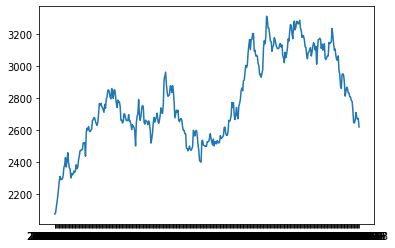

In [ ]:
import matplotlib.pyplot as plt

plt.plot(date,s3)

In [ ]:
!pip install plotly==4.12

In [ ]:
import plotly.express as px


In [ ]:
import plotly.express as px
fig = px.line(y=s5, x=date, title=  'Stock 5')

fig.add_vline(x='2011-08-03') 
fig.show()

In [ ]:
fig = px.line(y=s4, x=date, title=  'Stock 4')

fig.add_vline(x='2011-08-03') 
fig.show()

In [ ]:
fig = px.line(y=s3, x=date, title=  'Stock 3')

fig.add_vline(x='2011-08-03') 
fig.show()

In [ ]:
fig = px.line(y=s2, x=date, title=  'Stock 2')

fig.add_vline(x='2011-08-03') 
fig.show()

In [ ]:
fig = px.line(y=s1[285:], x=date.iloc[285:], title=  'Stock 1')

fig.add_vline(x='2011-08-03') 
fig.show()

# Feature importances

In [ ]:
!pip install eli5

In [ ]:


import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(bagging, random_state=1).fit(X1, y1)
eli5.show_weights(perm, feature_names = X1.columns.tolist())


Weight,Feature
2.2585 ± 0.2353,VWAP-Stock-1
0.1927 ± 0.0105,Open-Stock-1
0.0368 ± 0.0055,Low-Stock-1
0.0265 ± 0.0010,High-Stock-1
